# Practice Association Rules  - Minneapolis Crime Data

The dataset used in the notebook (curtesy of Open Data Minneapolis) includes information about police calls and crimes committed between 2010 to 2016. 

We will use the data to do some association rule mining for finding frequent patterns. More specifically we will explore association between crime type, location, and time. 

Read the data from `/dsa/data/all_datasets/minneapolis_crimedata/crimes.csv`


In [1]:
import pandas as pd
import datetime
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crimes_data = pd.read_csv('/dsa/data/all_datasets/minneapolis_crimedata/crimes.csv')

In [3]:
crimes_data.head()

,publicaddress,controlnbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,Long,Lat,x,y,Neighborhood,lastchanged,LastUpdateDate,OBJECTID,ESRI_OID
0,0029XX Chicago AV S,2001,MP 2010 049740,3,2010-02-22T13:40:00.000Z,2010-02-22T13:22:00.000Z,13:22:00,SHOPLF,Shoplifting,7,2010-02-22T13:37:48.000Z,-93.263046,44.948990,531143.892490,157587.015062,PHILLIPS WEST,2010-02-22T18:51:39.000Z,2015-09-21T14:16:59.000Z,NaN,NaN
1,0049XX Queen AV N,2002,MP 2010 999144,4,2010-02-22T13:38:15.000Z,2010-02-21T08:00:00.000Z,08:00:00,TFMV,Theft From Motr Vehc,7,2010-02-22T13:38:15.000Z,-93.310883,45.044510,518728.331524,192399.855770,SHINGLE CREEK,2010-02-22T13:38:22.000Z,2015-09-21T14:16:59.000Z,NaN,NaN
2,0003XX 16 AV SE,2003,MP 2010 999143,2,2010-02-22T13:40:50.000Z,2010-02-19T23:20:00.000Z,23:20:00,THEFT,Other Theft,7,2010-02-22T13:40:50.000Z,-93.233833,44.978649,538691.047294,168413.815122,UNIVERSITY OF MINNESOTA,2010-02-23T13:44:28.000Z,2015-09-21T14:16:59.000Z,NaN,NaN
3,0016XX University AV SE,2004,MP 2010 049741,2,2010-02-22T14:15:00.000Z,2010-02-20T23:00:00.000Z,23:00:00,TBLDG,Theft From Building,7,2010-02-22T14:14:52.000Z,-93.233490,44.978512,538777.306959,168365.463674,UNIVERSITY OF MINNESOTA,2010-02-23T05:56:14.000Z,2015-09-21T14:16:59.000Z,NaN,NaN
4,00003X 9 ST S,2005,MP 2010 049818,1,2010-02-22T15:00:00.000Z,2010-02-21T16:00:00.000Z,16:00:00,THEFT,Other Theft,7,2010-02-22T15:02:28.000Z,-93.275513,44.975861,527903.684473,167382.223752,DOWNTOWN WEST,2010-02-23T15:22:47.000Z,2015-09-21T14:16:59.000Z,NaN,NaN


In [4]:
crimes_data.shape

(136121, 20)

The columns 
- `controlnbr`
- `CCN`
- `Time`
- `ReportedDate`
- `Offense`
- `UCRCode`
- `EnteredDate`
- `Long`
- `Lat`
- `x`
- `y`
- `lastchanged`
- `LastUpdateDate`
- `OBJECTID`
- `ESRI_OID` 

are not helpful or interpretable. So lets just delete them from dataset.

**Activity 1:** publicaddress, BeginDate, and Description. 

In [5]:
# Your code for activity 1 goes here..
crimes_data = crimes_data.iloc[:, [0,5,8]]

In [6]:
crimes_data.head()

,publicaddress,BeginDate,Description
0,0029XX Chicago AV S,2010-02-22T13:22:00.000Z,Shoplifting
1,0049XX Queen AV N,2010-02-21T08:00:00.000Z,Theft From Motr Vehc
2,0003XX 16 AV SE,2010-02-19T23:20:00.000Z,Other Theft
3,0016XX University AV SE,2010-02-20T23:00:00.000Z,Theft From Building
4,00003X 9 ST S,2010-02-21T16:00:00.000Z,Other Theft


The first 6 characters in publicaddress don't make any sense. 

**Activity 2:** Strip the first 7 characters or extract the rest of the characters from the publicaddress column.

In [7]:
crimes_data['publicaddress'] = crimes_data['publicaddress'].str[7:]

In [8]:
crimes_data.head()

,publicaddress,BeginDate,Description
0,Chicago AV S,2010-02-22T13:22:00.000Z,Shoplifting
1,Queen AV N,2010-02-21T08:00:00.000Z,Theft From Motr Vehc
2,16 AV SE,2010-02-19T23:20:00.000Z,Other Theft
3,University AV SE,2010-02-20T23:00:00.000Z,Theft From Building
4,9 ST S,2010-02-21T16:00:00.000Z,Other Theft





**Activity 3:** Convert BeginDate to date_time using pandas to_datetime. Add three new columns by extracting date, weekday, and hour from the BeginDate. 

In [9]:
crimes_data['BeginDate'] = pd.to_datetime(crimes_data['BeginDate'],utc=True)
crimes_data['BeginDate'] = pd.to_datetime(crimes_data['BeginDate'],errors='coerce').dt.tz_localize(None)

In [10]:
crimes_data.head()

,publicaddress,BeginDate,Description
0,Chicago AV S,2010-02-22 13:22:00,Shoplifting
1,Queen AV N,2010-02-21 08:00:00,Theft From Motr Vehc
2,16 AV SE,2010-02-19 23:20:00,Other Theft
3,University AV SE,2010-02-20 23:00:00,Theft From Building
4,9 ST S,2010-02-21 16:00:00,Other Theft


In [11]:
# crimes_data['date'] = (crimes_data.BeginDate).dt.date
crimes_data['weekday'] = (crimes_data.BeginDate).dt.day_name()
crimes_data['hour'] = (crimes_data.BeginDate).dt.hour

In [12]:
crimes_data.head()

,publicaddress,BeginDate,Description,weekday,hour
0,Chicago AV S,2010-02-22 13:22:00,Shoplifting,Monday,13
1,Queen AV N,2010-02-21 08:00:00,Theft From Motr Vehc,Sunday,8
2,16 AV SE,2010-02-19 23:20:00,Other Theft,Friday,23
3,University AV SE,2010-02-20 23:00:00,Theft From Building,Saturday,23
4,9 ST S,2010-02-21 16:00:00,Other Theft,Sunday,16


**Activity 6:** Convert the hour variable into an ordered factor with levels "mid night", "morning", "noon","night" for different hours of the day. 

In [13]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [0, 4, 11,14, 24]
labels = ["mid night", "morning", "noon","night"]
crimes_data['hour'] = pd.cut(crimes_data['hour'], bins=bins, labels=labels, right=False)

In [14]:
crimes_data.head()

,publicaddress,BeginDate,Description,weekday,hour
0,Chicago AV S,2010-02-22 13:22:00,Shoplifting,Monday,noon
1,Queen AV N,2010-02-21 08:00:00,Theft From Motr Vehc,Sunday,morning
2,16 AV SE,2010-02-19 23:20:00,Other Theft,Friday,night
3,University AV SE,2010-02-20 23:00:00,Theft From Building,Saturday,night
4,9 ST S,2010-02-21 16:00:00,Other Theft,Sunday,night


We dont need the BeginDate column any more. So lets just delete it from dataframe.

In [15]:
crimes_data = crimes_data.drop(['BeginDate'],axis=1)

In [16]:
crimes_data.head()

,publicaddress,Description,weekday,hour
0,Chicago AV S,Shoplifting,Monday,noon
1,Queen AV N,Theft From Motr Vehc,Sunday,morning
2,16 AV SE,Other Theft,Friday,night
3,University AV SE,Theft From Building,Saturday,night
4,9 ST S,Other Theft,Sunday,night


**Activity 8:** Now, coerce the data set into transactions. Save this transactions to crimes_trans variable.

Hint: Use `get_dummies` function from pandas. see [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [17]:
crimes_data = pd.get_dummies(crimes_data.astype(str))

In [18]:
crimes_data.head()

,publicaddress_ / 12 ST S,publicaddress_ / 2 ST SE,publicaddress_ / 28 ST W,publicaddress_ / 29 ST W,publicaddress_ / Burnham RD,publicaddress_ / Irving AV S,publicaddress_ / Lake Isles PK E,publicaddress_ / Lake Isles PK W,publicaddress_ / Lake ST W,publicaddress_ / Lourdes PL,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,hour_mid night,hour_morning,hour_night,hour_noon
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
crimes_data.shape

(136121, 3156)

**Activity 9:** Slice the first 10000 transactions into a new dataframe. The new transaction data is too large for us to compute in this server, so we do for the first 10000 rows.

In [20]:
crimes_trans = crimes_data[:10000]

**Activity 10:** Generate association rules for the transactions in crimes_trans with support of 0.01 and confidence of 0.5

In [21]:
# step 1: identify frequent itemsets
frequent_itemsets = apriori(crimes_trans, min_support = 0.01,use_colnames=True)

# step 2: infer rules frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)


In [22]:
print(f"Number of rules = {rules.shape[0]}")

Number of rules = 29


**Activity 11:** Display top-5 generated rules in terms of conviction. 

In [23]:
rules_sorted = rules.sort_values(by =['conviction'], ascending=False)

In [24]:
rules_sorted.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(publicaddress_Nicollet Mall ),(Description_Other Theft),0.0185,0.2660,0.0113,0.610811,2.296281,0.006379,1.885972
11,(Description_Shoplifting),(hour_night),0.0323,0.5251,0.0236,0.730650,1.391450,0.006639,1.763134
0,(publicaddress_Hennepin AV S),(Description_Other Theft),0.0207,0.2660,0.0106,0.512077,1.925103,0.005094,1.504337
3,(publicaddress_Lake ST W),(hour_night),0.0162,0.5251,0.0109,0.672840,1.281355,0.002393,1.451581
24,"(weekday_Saturday, Description_Theft From Motr...",(hour_night),0.0273,0.5251,0.0182,0.666667,1.269599,0.003865,1.424700


**Activity 12:** Show some rules that are surprising. Lift and leverage are used to identify surprising rules. 

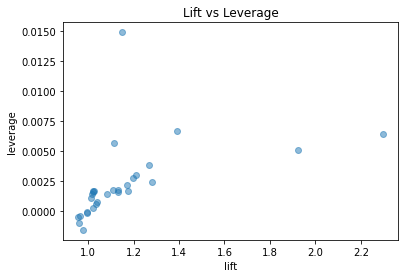

In [25]:
plt.scatter(rules['lift'], rules['leverage'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('leverage')
plt.title('Lift vs Leverage');

In [26]:
rules_sub = rules[(rules['lift'] >= 1.6)]
rules_sub.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(publicaddress_Hennepin AV S),(Description_Other Theft),0.0207,0.266,0.0106,0.512077,1.925103,0.005094,1.504337
4,(publicaddress_Nicollet Mall ),(Description_Other Theft),0.0185,0.266,0.0113,0.610811,2.296281,0.006379,1.885972


In [27]:
rules_sub = rules[(rules['leverage'] >= 0.01)]
rules_sub.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Description_Theft From Motr Vehc),(hour_night),0.188,0.5251,0.1136,0.604255,1.150743,0.014881,1.200016


# Save your notebook, then `File > Close and Halt`